In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel('kidneyDataset.xlsx')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].astype(str)
categorical_columns

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

categorical_columns = data.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))


non_categorical_columns = data.select_dtypes(exclude=['object']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[non_categorical_columns])
scaled_df = pd.DataFrame(scaled_data, columns=non_categorical_columns)

data_processed = pd.concat([scaled_df, one_hot_df], axis=1)

In [15]:
data_processed

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,classification_ckd,classification_ckd\t,classification_notckd
0,-1.727726,-0.203139,0.258373,0.454071,-0.012548,-0.410106,-0.341498,-0.424804,-0.326574,NaN,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.719066,-2.594124,-1.936857,0.454071,2.208413,-0.410106,NaN,-0.781687,-0.396338,NaN,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-1.710406,0.613295,0.258373,-1.297699,0.727772,2.323069,3.473064,-0.087748,-0.221928,NaN,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-1.701745,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,-0.392022,-0.028268,0.126891,-2.552778,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,-1.693085,-0.028189,0.258373,-1.297699,0.727772,-0.410106,-0.530963,-0.623073,-0.291692,NaN,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.693085,0.205078,0.258373,0.454071,-0.752868,-0.410106,-0.101509,-0.167055,-0.448661,1.200069,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
396,1.701745,-0.553039,-0.473370,1.329955,-0.752868,-0.410106,-0.922524,-0.523939,-0.326574,0.334027,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
397,1.710406,-2.302541,0.258373,0.454071,-0.752868,-0.410106,-0.606749,-0.623073,-0.431220,-0.050880,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
398,1.719066,-2.010957,-1.205114,1.329955,-0.752868,-0.410106,-0.429915,-0.147229,-0.361456,-0.243334,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
from sklearn.model_selection import train_test_split
x = data_processed.drop(['classification_ckd','classification_ckd\t','classification_notckd'],axis=1)
y = data_processed.drop(x,axis=1).astype(int)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print (x_train.shape)
print (y_train.shape)
print(type(x_train))
print(type(y_train))

(300, 223)
(300, 3)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [17]:
from tensorflow.keras.models import Sequential
import keras
from tensorflow.keras.optimizers import  Adam

In [19]:
model= Sequential()
model.add(keras.Input(shape=223))
model.add(keras.layers.Dense(5,activation='relu'))
model.add(keras.layers.Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 1120      
                                                                 
 dense_5 (Dense)             (None, 3)                 18        
                                                                 


Total params: 1138 (4.45 KB)
Trainable params: 1138 (4.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',loss= 'categorical_crossentropy', metrics=['acc'])

In [21]:
hist= model.fit(x_train, y_train, batch_size=8,epochs= 10, validation_split=0.1)

Epoch 1/10
34/34 [==============================] - 0s 4ms/step - loss: nan - acc: 0.6148 - val_loss: nan - val_acc: 0.5333
Epoch 2/10
34/34 [==============================] - 0s 2ms/step - loss: nan - acc: 0.6185 - val_loss: nan - val_acc: 0.5333
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: nan - acc: 0.6185 - val_loss: nan - val_acc: 0.5333
Epoch 4/10
34/34 [==============================] - 0s 2ms/step - loss: nan - acc: 0.6185 - val_loss: nan - val_acc: 0.5333
Epoch 5/10
34/34 [==============================] - 0s 1ms/step - loss: nan - acc: 0.6185 - val_loss: nan - val_acc: 0.5333
Epoch 6/10
34/34 [==============================] - 0s 2ms/step - loss: nan - acc: 0.6185 - val_loss: nan - val_acc: 0.5333
Epoch 7/10
34/34 [==============================] - 0s 2ms/step - loss: nan - acc: 0.6185 - val_loss: nan - val_acc: 0.5333
Epoch 8/10
34/34 [==============================] - 0s 2ms/step - loss: nan - acc: 0.6185 - val_loss: nan - val_acc: 0.5333
Epoch 9/

Keys in history object: dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


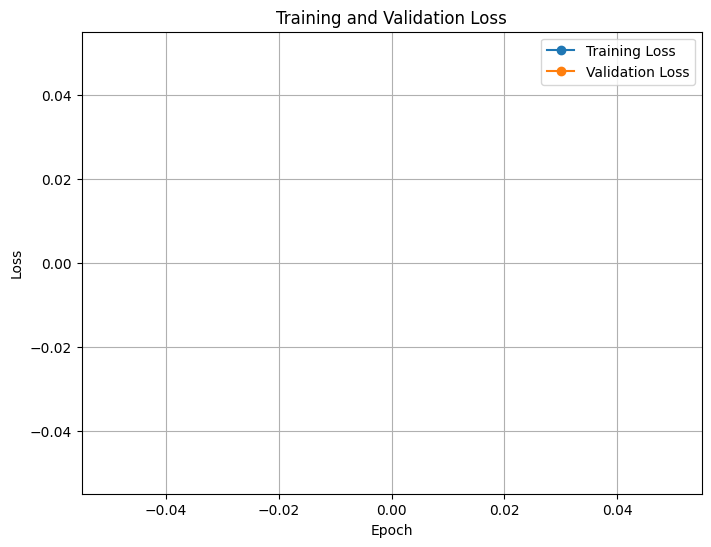

In [22]:
# Check keys in history object
print("Keys in history object:", hist.history.keys())

# Plot training loss and validation loss
plt.figure(figsize=(8, 6))
plt.plot(hist.history['loss'], label='Training Loss', marker='o')
plt.plot(hist.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()